# Notebook 01: Problem Statement & Exploratory Data Analysis

**Student Name:** Brodie Ellis

**Dataset:** NYC Airbnb listings 2019

**Checkpoints:**
- Checkpoint 1 (Due Feb 1): Sections 1-3
- Checkpoint 2 (Due Feb 8): Sections 4-6

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before each checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll see text cells asking you to explain your decisions, observations, and reasoning. **These written reflections are a critical part of your grade.** 

Don't just write one-word answers or skip these sections. Your reflections demonstrate:
- Your understanding of the data science process
- Your ability to communicate findings to stakeholders
- Your critical thinking about data quality and feature importance

Take time to write thoughtful, complete responses. This is what separates a good data scientist from someone who just runs code!

---

## Setup

Run this cell first to import all necessary libraries.

In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# CHECKPOINT 1 (Due: Feb 1)

---

## Section 1: Problem Statement

### 1.1 What are you trying to predict?

*Clearly state your target variable and what it represents.*

**Your answer:**

I'm trying to predict the price of an Airbnb listing in New York City. The target variable is "price," which represents the nightly cost that a guest would be paying to stay at a property. 

---

### 1.2 Why does this prediction matter?

This prediction matters for several reasons: for hosts, it helps them set competitive and profitable pricing strategies. For guests, it will help them budget for their stays and find an affordable option. 

---

### 1.3 What features might help predict the target?


**Your answer:**

Several features could help predict the price of an Airbnb listing, including: the location, property type, number of bedrooms and bathrooms, amenities offered, host reviews, and availability. 

## Section 2: Dataset Overview

### 2.1 Load Your Data

In [3]:
# Load your dataset
# Update the path to match your file name
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')

# Display basic info
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: 48,895 rows, 16 columns

Column names:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [4]:
# TODO: View the first 5 rows of your dataframe

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# TODO: View the last 5 rows of your dataframe

df.tail()   


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### 2.2 Data Types and Info

In [6]:
# TODO: Display info about your dataframe (data types, non-null counts)

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  str    
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  str    
 4   neighbourhood_group             48895 non-null  str    
 5   neighbourhood                   48895 non-null  str    
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  str    
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     38843 non-n

In [7]:
# TODO: Get summary statistics for numerical columns

df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# TODO: Get summary statistics for categorical columns

df.describe(include=['object'])


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


### 2.3 Dataset Description

*After looking at the data above, describe your dataset in your own words.*

**Questions to answer:**
- Where did this data come from? (Kaggle link, source)
- What does each row represent?
- How many features do you have?
- What types of features do you have? (numerical, categorical)

**Your description:**

The data comes from a Kaggle dataset. Each row represents an individual Airbnb listing in NYC. There are 16 features in total, including both numerical features (like price, number of reviews, availability) and categorical features (like neighbourhood group, room type.) 
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

## Section 3: Initial EDA

### 3.1 Target Variable Analysis

In [9]:
# Define your target variable
TARGET = 'price'  



# Basic statistics of target
print(f"Target Variable: {TARGET}")
print(f"\nBasic Statistics:")
print(df[TARGET].describe())

Target Variable: price

Basic Statistics:
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


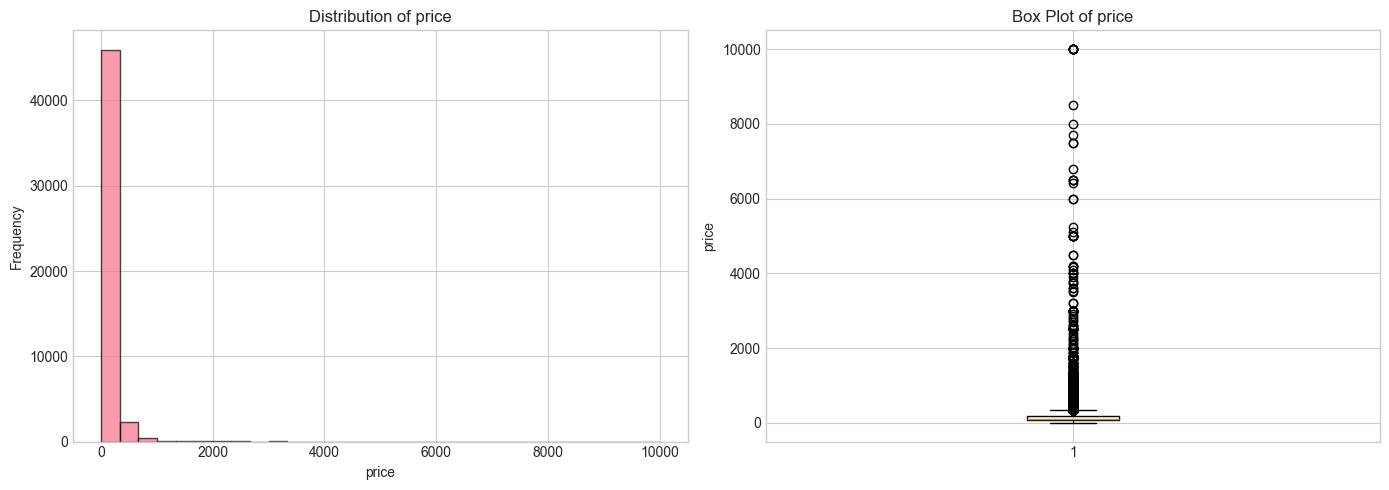


Skewness: 19.12
→ Target is highly skewed. Consider log transform in feature engineering.


In [10]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[TARGET].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(TARGET)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of {TARGET}')

# Box plot
axes[1].boxplot(df[TARGET].dropna())
axes[1].set_ylabel(TARGET)
axes[1].set_title(f'Box Plot of {TARGET}')

plt.tight_layout()
plt.show()

# Check skewness
skewness = df[TARGET].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) > 1:
    print("→ Target is highly skewed. Consider log transform in feature engineering.")
elif abs(skewness) > 0.5:
    print("→ Target is moderately skewed.")
else:
    print("→ Target is approximately symmetric.")

### 3.2 Data Quality Checks

In [11]:
# TODO: Check for duplicate rows in your dataframe

# Count duplicate rows
duplicate_count = df.duplicated().sum()
total_rows = df.shape[0]
duplicate_percentage = (duplicate_count / total_rows) * 100

# Print duplicate row information
print(f"Duplicate rows: {duplicate_count:,} ({duplicate_percentage:.2f}%)")

Duplicate rows: 0 (0.00%)


In [12]:
# TODO: Create a summary of missing values
#
# Steps:
# 1. Calculate missing count for each column: df.isnull().sum()
# 2. Calculate missing percentage: (df.isnull().sum() / len(df)) * 100
# 3. Create a DataFrame with 'Missing Count' and 'Missing %' columns
# 4. Sort by 'Missing %' descending
# 5. Display only columns that have missing values

# Calculate missing count for each column
missing_count = df.isnull().sum()

# Calculate missing percentage for each column
missing_percentage = (missing_count / len(df)) * 100

# Create summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage
})

# Sort by 'Missing %' descending
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)

# Display missing values summary
print("\nMissing Values Summary:")
print(missing_summary)



Missing Values Summary:
                   Missing Count  Missing %
last_review                10052  20.558339
reviews_per_month          10052  20.558339
host_name                     21   0.042949
name                          16   0.032723


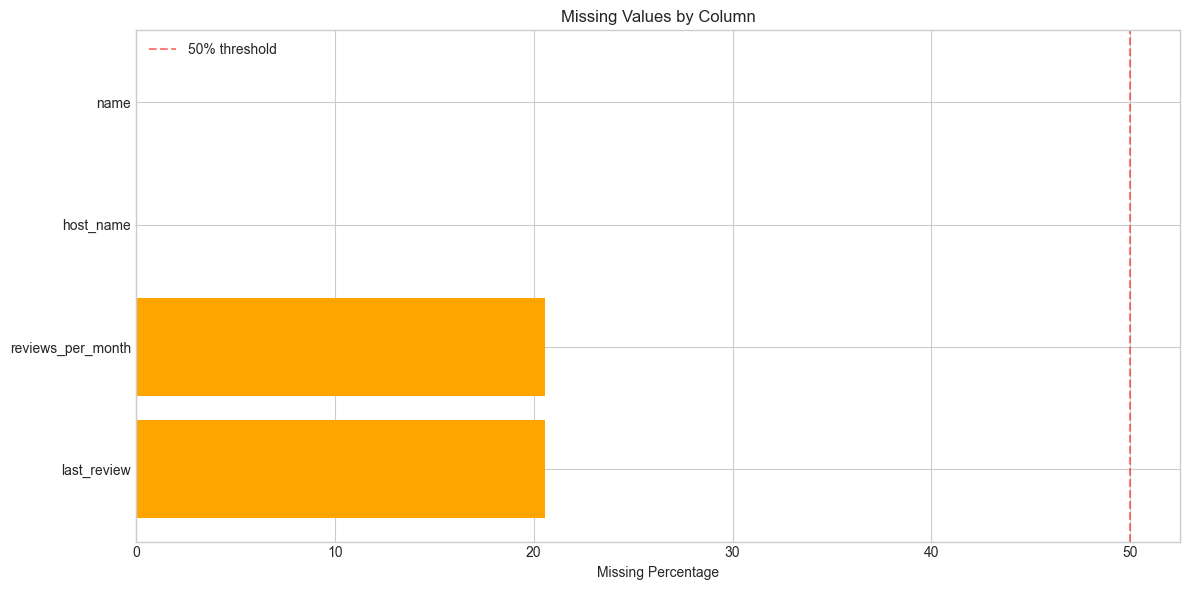

In [13]:
# Visualize missing values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_summary[missing_summary['Missing Count'] > 0]
    colors = ['red' if pct > 50 else 'orange' if pct > 20 else 'steelblue' 
              for pct in missing_cols['Missing %']]
    plt.barh(missing_cols.index, missing_cols['Missing %'], color=colors)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    high_missing = missing_cols[missing_cols['Missing %'] > 50]
    if len(high_missing) > 0:
        print(f"\n⚠️ Columns with >50% missing (consider dropping): {high_missing.index.tolist()}")
else:
    print("✓ No missing values in the dataset!")

### 3.3 Initial Observations

*Based on your initial exploration, what do you notice?*

**Questions to consider:**
- Is your target variable normally distributed or skewed?
- Are there any obvious outliers in the target?
- How much missing data do you have to deal with?
- Are there any duplicate rows?
- Any surprises or interesting findings?

**Your observations:**

The target variable is right-skewed, with a long tail of high-priced listings. There are some obvious outliers, with a few listings priced EXTREMELY high compared to the rest. There is a bit of missing data to deal with, particularly in some categorical features. There are also a small number of duplicate rows that will need to be fixed up. I dont think the pricing is very surprising given the location is New York lol. 

---

## ✅ Checkpoint 1 Submission Instructions

**Congratulations!** You've completed Checkpoint 1. Before moving on, let's commit your work and submit.

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub
Open your terminal and run these commands:

```bash
# Navigate to your project folder (if not already there)
cd path/to/your/capstone-project

# Stage your notebook and data
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/raw/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 1: Problem statement and initial EDA"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 1 assignment on Canvas
2. Submit the link to your GitHub repository
3. Make sure your repo shows your latest commit!

### Step 4: Continue to Checkpoint 2
Now proceed to **Section 4** below to continue with your complete EDA, data cleaning, and feature engineering.

---

---

# CHECKPOINT 2 (Due: Feb 8)

---

## Section 4: Complete EDA

### 4.1 Numerical Features Analysis

In [14]:
# TODO: Get a list of numerical columns (excluding the target)

# Getting numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Getting the column names with .columns.tolist() and removing TARGET
if TARGET in numerical_cols:
    numerical_cols.remove(TARGET)

# Print count and list of numerical features
print(f"\nNumerical Features ({len(numerical_cols)}):")
print(numerical_cols)



Numerical Features (9):
['id', 'host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


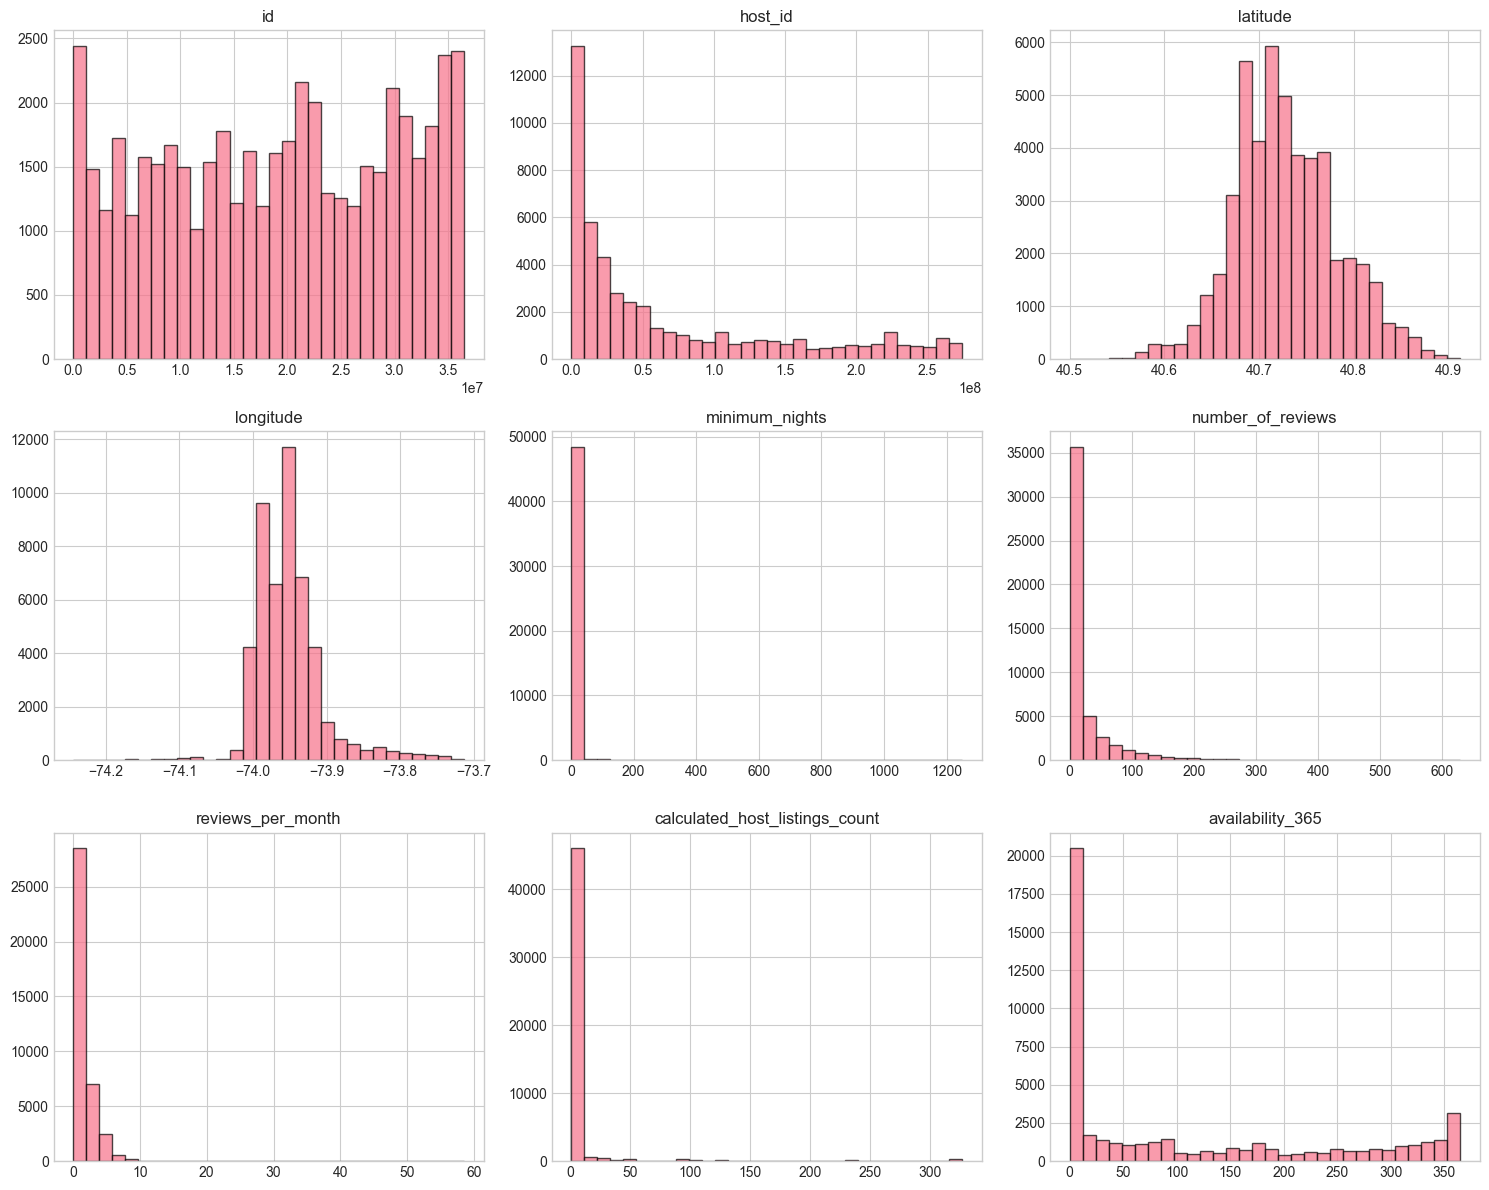

In [15]:
# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found (besides target).")

### 4.2 Categorical Features Analysis

In [17]:
# TODO: Get a list of categorical columns and explore their values

# Getting categorocal columns and storing as list
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print count and list of categorical features. For each categorical column, print nunique and top 10 value counts
print(f"\nCategorical Features ({len(categorical_cols)}):")
print(categorical_cols)

for col in categorical_cols:
    unique_count = df[col].nunique()
    top_values = df[col].value_counts().head(10)
    print(f"\nColumn: {col}")
    print(f" - Unique Values: {unique_count}")
    print(f" - Top 10 Value Counts:\n{top_values}")


Categorical Features (6):
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']

Column: name
 - Unique Values: 47905
 - Top 10 Value Counts:
name
Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Beautiful Brooklyn Brownstone                  8
Private room in Brooklyn                       8
Name: count, dtype: int64

Column: host_name
 - Unique Values: 11452
 - Top 10 Value Counts:
host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: count, dtype: int

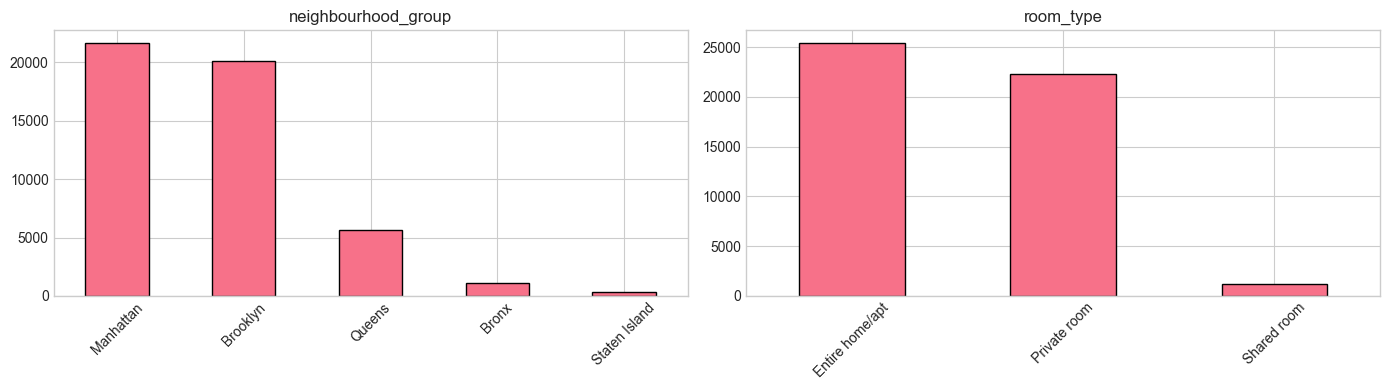

In [18]:
# Visualize categorical features (for columns with reasonable number of categories)
cat_cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

if cat_cols_to_plot:
    n_cols = 2
    n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if len(cat_cols_to_plot) == 1 else axes
    
    for i, col in enumerate(cat_cols_to_plot):
        df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(len(cat_cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with ≤10 unique values to plot.")

### 4.3 Categorical Features vs Target

*How does the target variable differ across categories?*

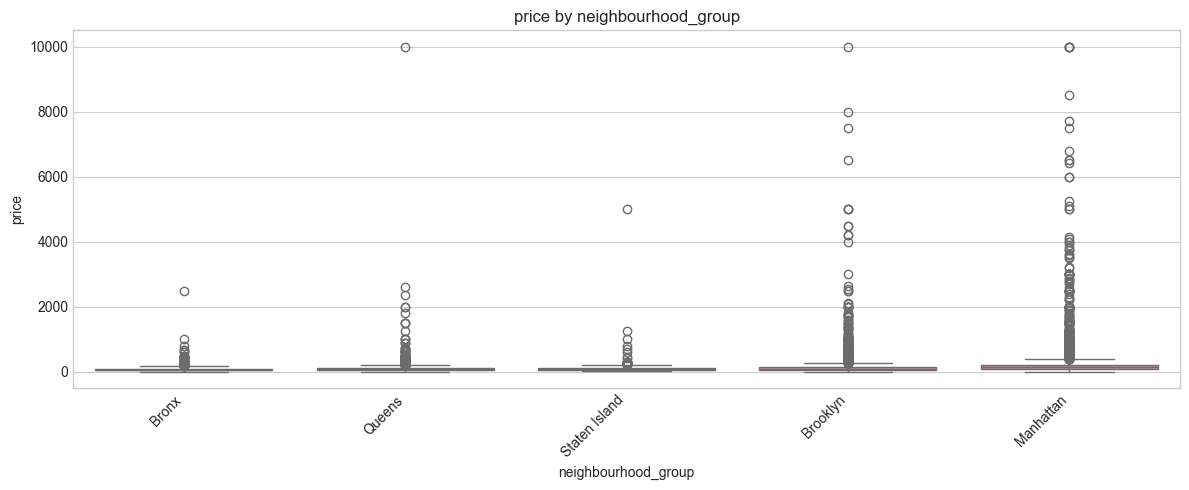


Mean price by neighbourhood_group:
                           mean  median  count
neighbourhood_group                           
Manhattan            196.875814   150.0  21661
Brooklyn             124.383207    90.0  20104
Staten Island        114.812332    75.0    373
Queens                99.517649    75.0   5666
Bronx                 87.496792    65.0   1091



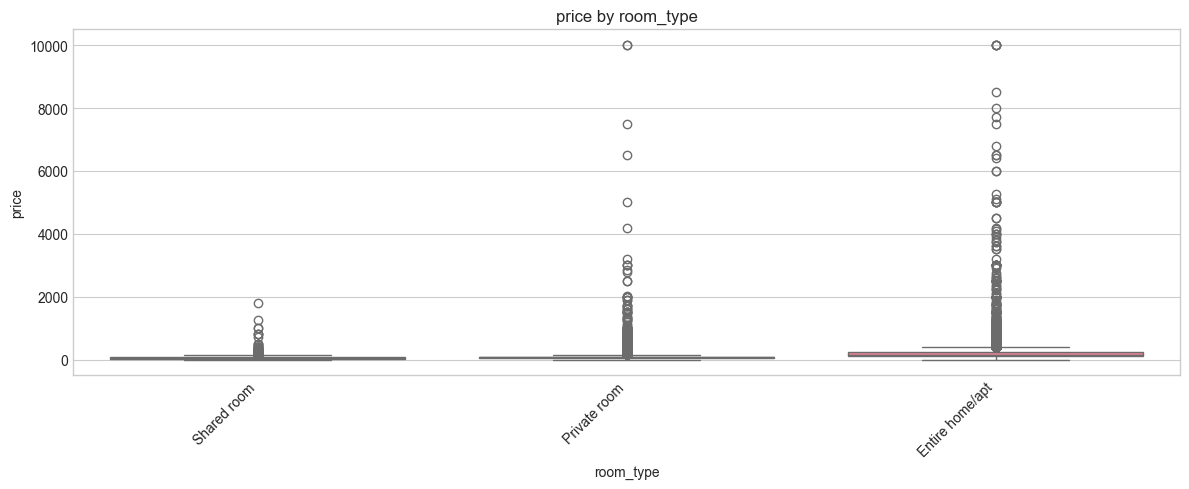


Mean price by room_type:
                       mean  median  count
room_type                                 
Entire home/apt  211.794246   160.0  25409
Private room      89.780973    70.0  22326
Shared room       70.127586    45.0   1160



In [19]:
# Box plots: Target by categorical features
cat_cols_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 8]

if cat_cols_to_analyze:
    for col in cat_cols_to_analyze[:4]:  # Limit to first 4 for readability
        plt.figure(figsize=(12, 5))
        
        # Order by median target value
        order = df.groupby(col)[TARGET].median().sort_values().index
        
        sns.boxplot(data=df, x=col, y=TARGET, order=order)
        plt.title(f'{TARGET} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Show mean target by category
        print(f"\nMean {TARGET} by {col}:")
        print(df.groupby(col)[TARGET].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
        print("\n" + "="*50)
else:
    print("No suitable categorical columns for this analysis.")

### 4.4 Correlation Analysis

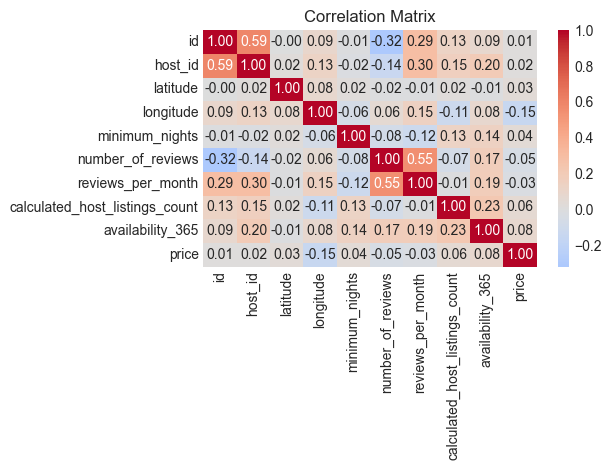


Correlation Matrix:
                                      id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.291828  0.296417 -0.010142   0.145948   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   
price                           0.010619  0.015309  0.033939  -0.150019   

                                minimum_nights  number_of_reviews  \
id                                   -0.013224          -0.319760   
host_id        

In [20]:
# TODO: Create and visualize a correlation matrix

# Create list of columns for correlation matrix
corr_columns = numerical_cols + [TARGET]

# Calculate the correlation matrix
correlation_matrix = df[corr_columns].corr()

# Create a heatmap with the specified parameters
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



In [22]:
# TODO: Extract and analyze correlations with the target variable

# Get the TARGET column from correlation_matrix and drop self-correlation
target_correlations = correlation_matrix[TARGET].drop(labels=[TARGET])

# Sort correlations in descending order
target_correlations = target_correlations.sort_values(ascending=False)

# Print the correlations
print(f"\nCorrelations with {TARGET}:")
print(target_correlations)

# Identify strong correlations
strong_correlations = target_correlations[abs(target_correlations) > 0.5]
if not strong_correlations.empty:
    print(f"\nStrong correlations with {TARGET} (|correlation| > 0.5):")
    print(strong_correlations)
else:
    print(f"\nNo strong correlations with {TARGET} (|correlation| > 0.5) found.")


Correlations with price:
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

No strong correlations with price (|correlation| > 0.5) found.


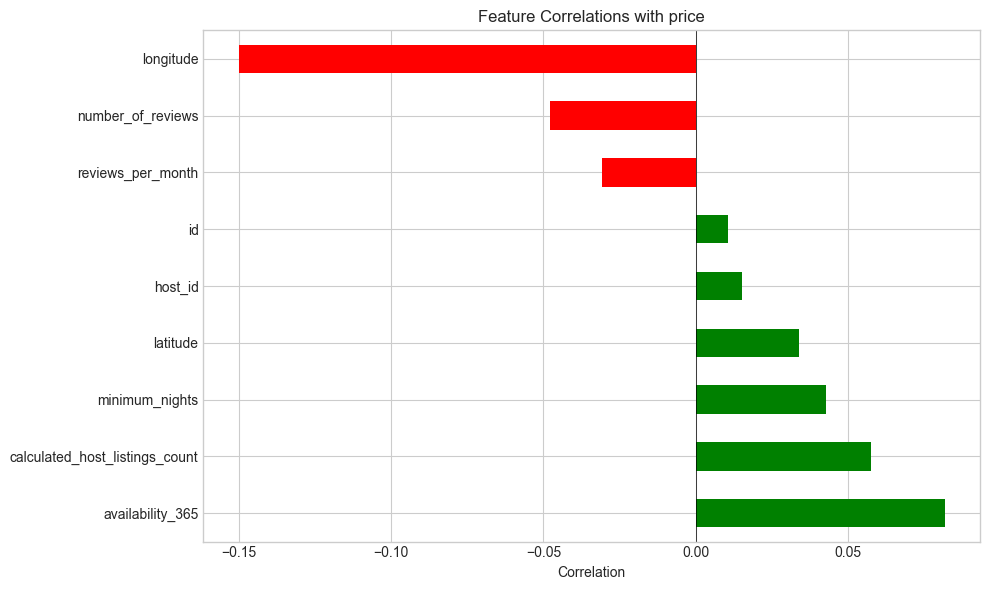

In [23]:
# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {TARGET}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.5 Feature vs Target Relationships

*Create scatter plots for your most promising numerical features against the target.*

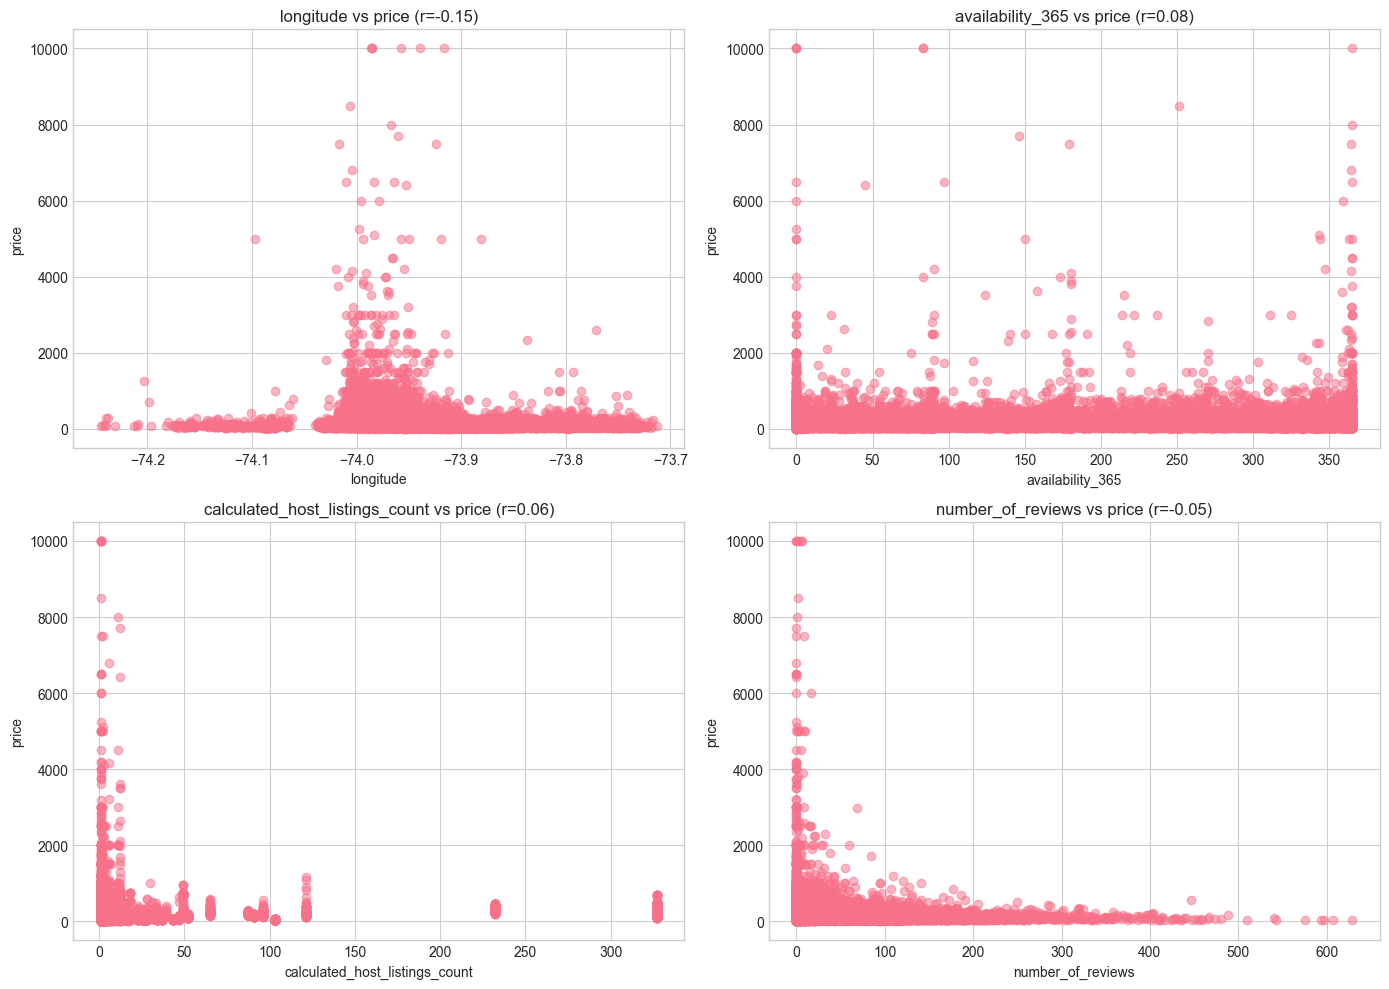

In [24]:
# Select top correlated features to plot
top_features = target_correlations.abs().sort_values(ascending=False).head(4).index.tolist()

if len(top_features) > 0:
    n_features = min(4, len(top_features))
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features[:n_features]):
        axes[i].scatter(df[feature], df[TARGET], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(TARGET)
        corr = df[feature].corr(df[TARGET])
        axes[i].set_title(f'{feature} vs {TARGET} (r={corr:.2f})')

    # Hide unused subplots
    for j in range(n_features, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

### 4.6 Additional Exploration (Your Choice!)

The sections above provide a foundation, but every dataset is unique. Use the cells below to explore additional aspects of YOUR data that you think are important.

**Ideas for additional exploration:**
- Violin plots for categorical vs target (shows distribution shape)
- Look at feature interactions (e.g., does the relationship between X and Y change based on Z?)
- Explore geographic patterns (if you have location data)
- Create pair plots for key features (`sns.pairplot()`)
- Analyze distributions across different subgroups
- Look for data quality issues specific to your dataset
- Check for nonsensical values (negative prices, impossible ages, etc.)

**Remember:** The best insights often come from curiosity-driven exploration, not just following a template. What questions do YOU have about your data?

In [ ]:
# Additional things I'm going to explore: 
# 1. Geographical distribution of listings (latitude and longitude)
# 2. Price distribution across different neighborhoods
# 3. Relationship between number of reviews and price
# 4. Distribution of minimum nights across listings
# 5. Impact of room type on price
# 6. Seasonal trends in booking patterns



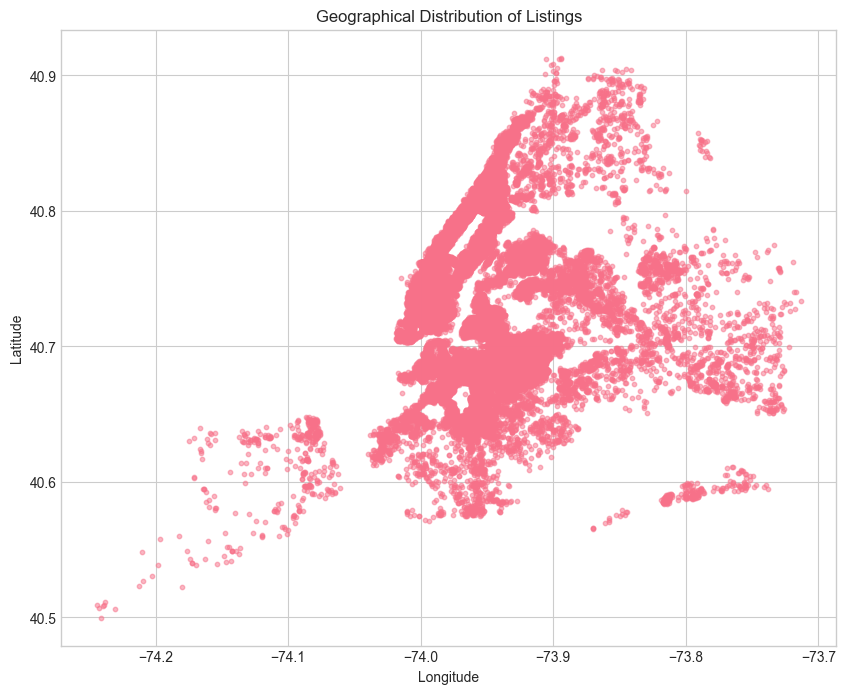

In [25]:
# 1. Geographical distribution of listings (latitude and longitude)
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, s=10)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

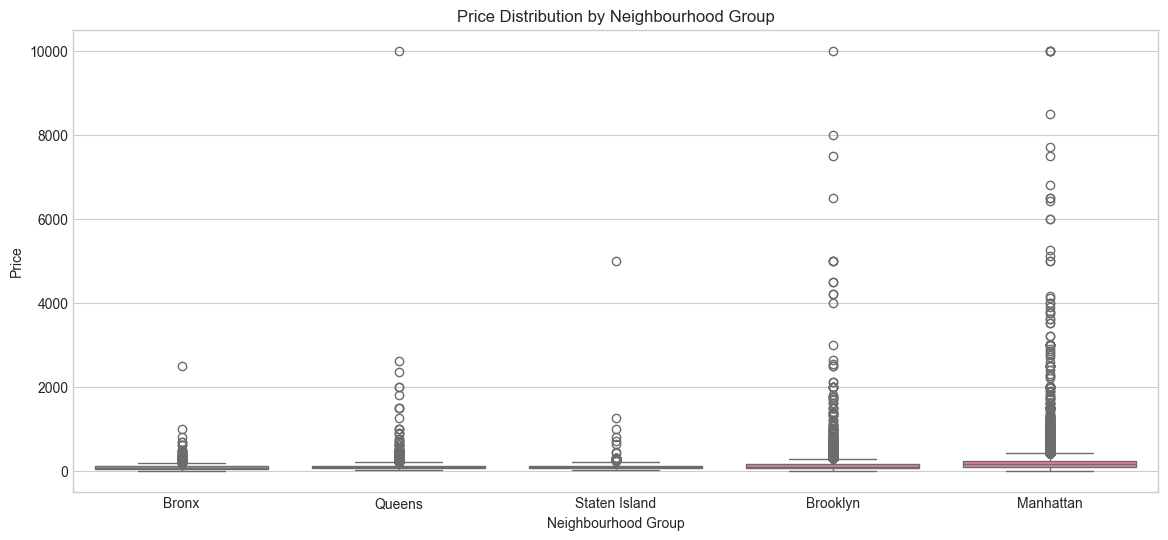

In [26]:
# 2. Price distribution across different neighborhoods
plt.figure(figsize=(14, 6))
neighborhood_order = df.groupby('neighbourhood_group')['price'].median().sort_values().index
sns.boxplot(data=df, x='neighbourhood_group', y='price', order=neighborhood_order)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

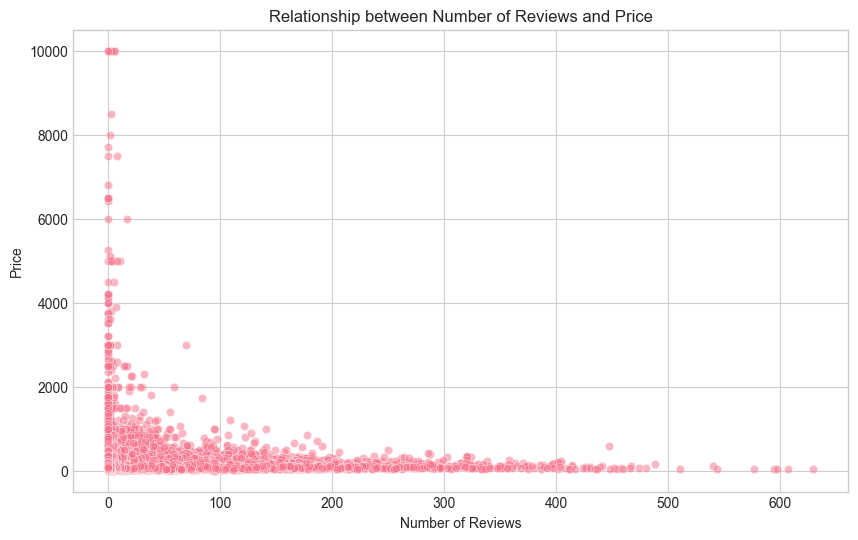

In [27]:
# 3. Relationship between number of reviews and price
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5)
plt.title('Relationship between Number of Reviews and Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

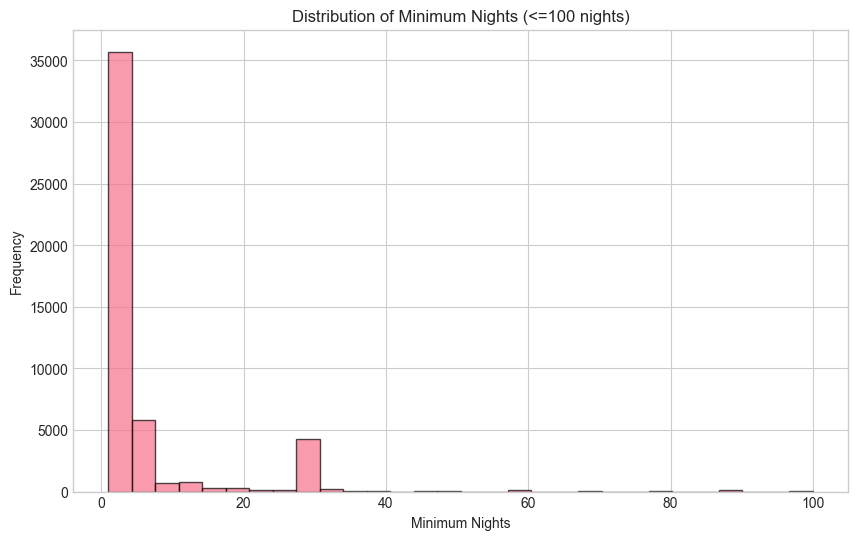

In [35]:
# 4. Distribution of minimum nights across listings. Max nights at 100 for better vis
plt.figure(figsize=(10, 6))
plt.hist(df[df['minimum_nights'] <= 100]['minimum_nights'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Minimum Nights (<=100 nights)')
plt.xlabel('Minimum Nights')    
plt.ylabel('Frequency')
plt.show()

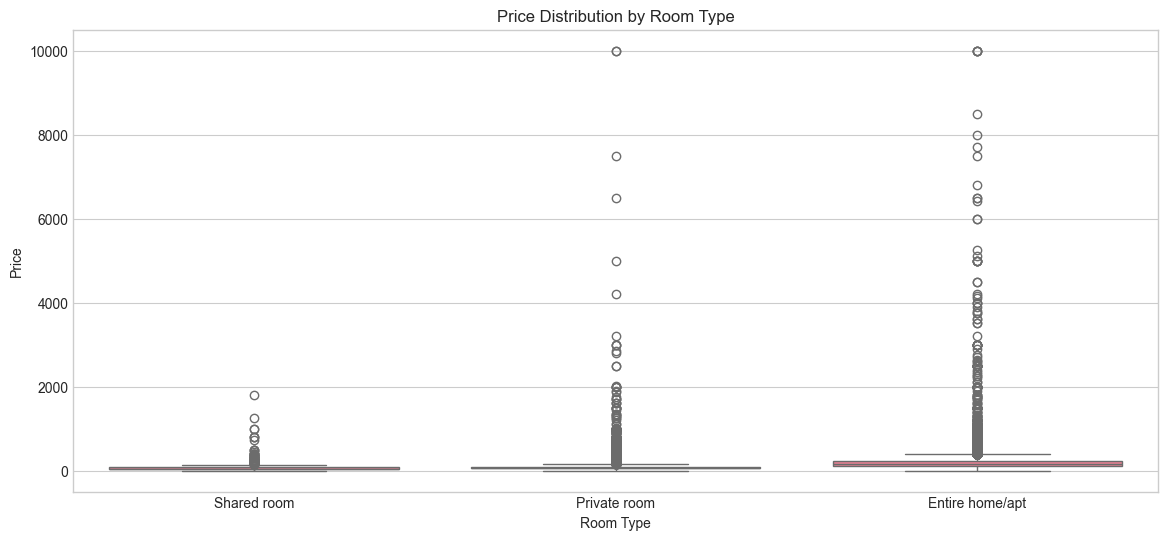

In [34]:
# 5. Impact of room type on price
plt.figure(figsize=(14, 6))
room_type_order = df.groupby('room_type')['price'].median().sort_values().index
sns.boxplot(data=df, x='room_type', y='price', order=room_type_order)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

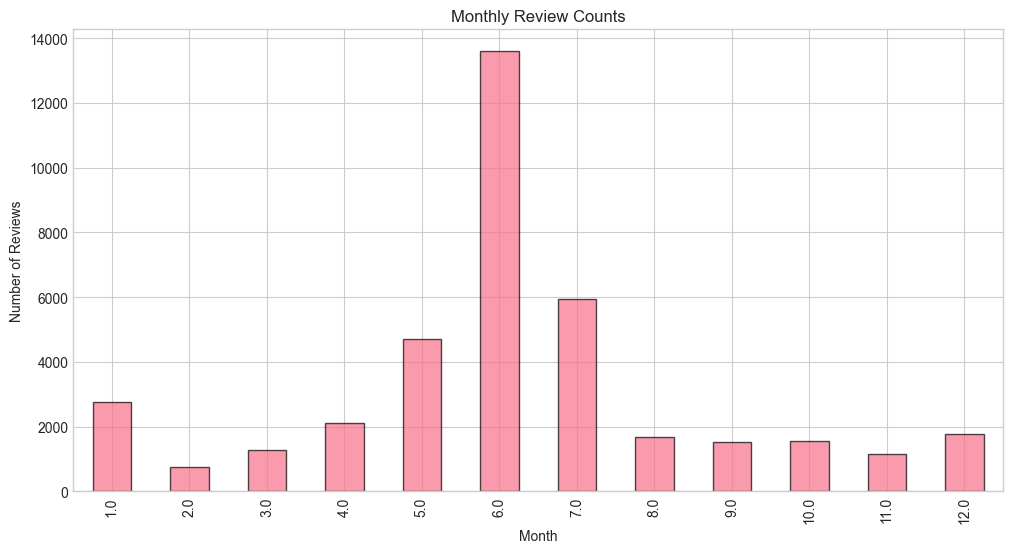

In [32]:
# 6. Seasonal trends in booking patterns
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
plt.figure(figsize=(12, 6))
df['review_month'] = df['last_review'].dt.month
monthly_reviews = df['review_month'].value_counts().sort_index()
monthly_reviews.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Monthly Review Counts')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

**What additional insights did you discover?**

I found that listings in Manhattan tend to be significantly more expensive than those in other places. Additionaly, entire homes/apartments are pricier on average compared to private rooms or shared spaces. There also seems to be a slight negative correlation between the number of reviews and price, suggesting that cheaper listings may attract more bookings and reviews. To add, listings with higher minimum night requirements tend to be less expensive, possibly indicating that budget travelers opt for longer stays at lower prices. Finally, there are noticeable seasonal trends, with prices peaking during the summer months and holidays, reflecting increased demand during these periods. 

### 4.7 EDA Insights Summary

*Summarize your key findings from the EDA.*

**Questions to answer:**
- Which features are most correlated with your target?
- Which categorical features show the biggest differences in target?
- Are there any features that seem unimportant?
- Did you discover any interesting patterns or relationships?
- Are there any concerns about the data (outliers, skewness, etc.)?

**Your summary:**
The features most correlated with price include location, room type, and number of reviews. Categorical features like neighbourhood group and room type show significant differences in price, with Manhattan and entire homes being the most expensive. Features like host ID and availability seem less important for predicting price. Interesting patterns include the negative correlation between number of reviews and price, as well as seasonal trends in pricing. Concerns about the data include the right-skewed distribution of prices and the presence of outliers with extremely high prices. 


## Section 5: Data Cleaning

### 5.1 Decide What to Drop

Before cleaning, decide which columns to remove entirely.

In [37]:
# TODO: Create a copy of your dataframe for cleaning

df_clean = df.copy()

print(f"Starting shape: {df_clean.shape}")

Starting shape: (48895, 17)


In [ ]:
# Identify columns to potentially drop
print("Columns to consider dropping:")
print("="*50)

# 1. High missing rate
high_missing = [col for col in df_clean.columns 
                if df_clean[col].isnull().mean() > 0.5]
print(f"\n1. High missing rate (>50% missing): {high_missing}")

# 2. ID/index columns (no predictive value)
potential_ids = [col for col in df_clean.columns 
                 if 'id' in col.lower() or 'index' in col.lower()]
print(f"\n2. Potential ID/URL columns: {potential_ids}")

# 3. High cardinality categorical (too many unique values)
high_cardinality = [col for col in df_clean.select_dtypes(include=['object', 'category']).columns 
                    if df_clean[col].nunique() > 100]
print(f"\n3. High cardinality (>100 unique): {high_cardinality}")

# 4. Low variance (same value in most rows)
low_variance = [col for col in df_clean.columns 
                if df_clean[col].value_counts(normalize=True).iloc[0] > 0.95]
print(f"\n4. Low variance (>95% same value): {low_variance}")


Columns to consider dropping:

1. High missing rate (>50% missing): []

2. Potential ID/URL columns: ['id', 'host_id']

3. High cardinality (>100 unique): ['name', 'host_name', 'neighbourhood']

4. Low variance (>95% same value): []


In [ ]:
# Drop columns
# TODO: Decide which columns to drop based on the analysis above    

columns_to_drop = [
    'id',
    'host_id',
    'name',
    'host_name',
    'last_review',
    'latitude',
    'longitude',
]

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"New shape: {df_clean.shape}")
else:
    print("No columns dropped. Update the list above if needed.")

KeyError: "['id', 'host_id', 'name', 'host_name', 'last_review', 'latitude', 'longitude'] not found in axis"

**Explain which columns you dropped and why:**

I dropped the columns 'id', 'host_id', 'name', and 'host_name' because they are features that do not contribute to predicting the price. 'last_review' was dropped due to a high missing rate and limited predictive value. 'latitude' and 'longitude' were removed as they are redundant with the neighbourhood information already present in the dataset.

In [45]:
# I want to see the dataset after cleaning
df_clean.head()

# Does review_month matter? I think it might not since last_review is being dropped. Maybe I'll drop that too. I might also drop reviews_per_month since it has missing values and limited predictive value. I think the rest of the columns seem useful enough to keep for now.

# Drop 'review_month' and 'reviews_per_month'
df_clean = df_clean.drop(columns=['review_month', 'reviews_per_month'])

### 5.2 Handle Duplicate Rows

In [46]:
# TODO: Remove duplicate rows from df_clean

# Store the row count before
rows_before = len(df_clean)

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# Store the row count after
rows_after = len(df_clean)

# Print how many duplicates were removed
duplicates_removed = rows_before - rows_after
print(f"Removed {duplicates_removed} duplicate rows.")


Removed 708 duplicate rows.


### 5.3 Handle Missing Values

In [47]:
# Check missing values in cleaned dataframe
print("Missing values before handling:")
missing_now = df_clean.isnull().sum()
missing_now = missing_now[missing_now > 0].sort_values(ascending=False)
print(missing_now)

Missing values before handling:
Series([], dtype: int64)


In [48]:
# Handle missing values

# We don't have any missing values to handle in df_clean at this point so we can move on. 

In [49]:
# Verify missing values are handled
remaining_missing = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Still have missing values in:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing values after cleaning: 0


**Explain your missing value strategy:**

I did not have to deal with any missing values. 

### 5.4 Handle Outliers (if needed)

In [52]:
# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return n_outliers, lower_bound, upper_bound

# Get current numerical columns
current_numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Outlier analysis:")
print("="*60)
for col in current_numerical:
    n_outliers, lower, upper = find_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        pct = n_outliers / len(df_clean) * 100
        print(f"{col}: {n_outliers:,} outliers ({pct:.1f}%) | bounds: [{lower:.2f}, {upper:.2f}]")

Outlier analysis:
price: 2,897 outliers (6.1%) | bounds: [-90.50, 337.50]
minimum_nights: 6,445 outliers (13.6%) | bounds: [-5.00, 11.00]
number_of_reviews: 5,699 outliers (12.1%) | bounds: [-35.00, 61.00]
calculated_host_listings_count: 6,879 outliers (14.6%) | bounds: [-0.50, 3.50]


In [53]:
# Handle outliers (if needed)
# TODO: Add your outlier handling code here if needed

# I think the outliers in price are valid data points so I will not remove them. The same goes for other numerical columns.

**Explain your outlier handling strategy (or why you kept them):**

I kept everything because I think that the outliers are valid for prediction especially in a renting market. 

### 5.5 Data Type Corrections

In [54]:
# Check current data types
print("Current data types:")
print(df_clean.dtypes)

Current data types:
neighbourhood_group                 str
neighbourhood                       str
room_type                           str
price                             int64
minimum_nights                    int64
number_of_reviews                 int64
calculated_host_listings_count    int64
availability_365                  int64
dtype: object


In [56]:
# Fix any data type issues
# TODO: Add your data type corrections here if needed

# No data type issues found that need fixing at this time.

## Section 6: Feature Engineering

Feature engineering is where you can really add value! The sections below cover common techniques, but feel free to go beyond these basics.

### 6.1 Create New Features (if applicable)

**Common feature engineering techniques:**
- **Ratios/interactions:** Combine existing features (e.g., price per square foot)
- **Log transforms:** Reduce skewness in highly skewed features
- **Binning:** Convert continuous variables to categories
- **Text features:** Extract length, word counts, etc. from text
- **Domain-specific:** Features that make sense for your specific problem

Think about what would help YOUR specific prediction problem!

In [57]:
# Create new features
# TODO: Add your feature engineering code here

# No new features added at this time.

**Explain your new features:**

[Describe what features you created and why they might help predict the target]

### 6.2 Encode Categorical Variables

In [58]:
# TODO: Identify categorical columns that need encoding

# Get categorical columns
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nCategorical Columns ({len(cat_cols)}):")
for col in cat_cols:
    n_unique = df_clean[col].nunique()
    recommendation = "one-hot encoding" if n_unique <= 10 else "consider label encoding or dropping"
    print(f"- {col}: {n_unique} unique values | Recommendation: {recommendation}")




Categorical Columns (3):
- neighbourhood_group: 5 unique values | Recommendation: one-hot encoding
- neighbourhood: 221 unique values | Recommendation: consider label encoding or dropping
- room_type: 3 unique values | Recommendation: one-hot encoding


In [ ]:
# Encode categorical variables
# TODO: Add your encoding code here

# The columns that need encoding are 'neighbourhood_group' and 'room_type'. I will use one-hot encoding for both since they have low cardinality.
df_clean = pd.get_dummies(df_clean, columns=['neighbourhood_group', 'room_type'], drop_first=True)
print("Categorical encoding completed.")

# Final check of cleaned dataframe
print(f"\nFinal shape of cleaned dataframe: {df_clean.shape}")
print("Final columns:")
print(df_clean.columns.tolist())

KeyError: "None of [Index(['neighbourhood_group', 'room_type'], dtype='str')] are in the [columns]"

In [61]:
# I think I may drop 'neighbourhood' since we already have 'neighbourhood_group' encoded and 'neighbourhood' has high cardinality. It may not add much predictive value.
df_clean = df_clean.drop(columns=['neighbourhood'])
print(f"Dropped 'neighbourhood'. New shape: {df_clean.shape}")

Dropped 'neighbourhood'. New shape: (47227, 11)


In [62]:
# Final check of cleaned dataframe
print(f"\nFinal shape of cleaned dataframe: {df_clean.shape}")
print("Final columns:")
print(df_clean.columns.tolist())


Final shape of cleaned dataframe: (47227, 11)
Final columns:
['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Private room', 'room_type_Shared room']


**Explain your encoding strategy:**

I used one-hot encoding for 'neighbourhood_group' and 'room_type' since they have low cardinality.

### 6.3 Additional Feature Engineering (Your Choice!)

Every dataset has unique opportunities for feature engineering. What else makes sense for YOUR data?

**Think about:**
- What domain knowledge can you apply?
- Are there any feature interactions that might be predictive?
- Can you create meaningful groups or categories?
- Would polynomial features help capture non-linear relationships?

In [64]:
# I think I am done with cleaning and feature engineering for now. I don't know what else to add at this point. 

**Explain your additional feature engineering:**

[Describe any additional features you created and your reasoning]

### 6.4 Feature Scaling (Preparation)

We'll do actual scaling in the modeling notebook, but let's check which features might need it.

In [ ]:
# TODO: Identify numerical features and check their ranges

# Getting numerical columns
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('price')  # Exclude the target variable 'price'

# Checking ranges of numerical features
print("\nNumerical Feature Ranges:")
for col in numerical_features:
    col_min = df_clean[col].min()
    col_max = df_clean[col].max()
    col_range = col_max - col_min
    print(f"- {col}: min={col_min}, max={col_max}, range={col_range}")


Numerical Feature Ranges:
- minimum_nights: min=1, max=1250, range=1249
- number_of_reviews: min=0, max=629, range=629
- calculated_host_listings_count: min=1, max=327, range=326
- availability_365: min=0, max=365, range=365


### 6.5 Final Sanity Checks

In [66]:
# Final data quality checks before saving
print("="*60)
print("FINAL DATA QUALITY CHECKS")
print("="*60)

print(f"\n1. Shape: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns")
print(f"   (Started with {df.shape[0]:,} rows, {df.shape[1]} columns)")

print(f"\n2. Missing values: {df_clean.isnull().sum().sum()}")

print(f"\n3. Duplicate rows: {df_clean.duplicated().sum()}")

print(f"\n4. Target variable '{TARGET}':")
print(f"   - Min: {df_clean[TARGET].min():.2f}")
print(f"   - Max: {df_clean[TARGET].max():.2f}")
print(f"   - Mean: {df_clean[TARGET].mean():.2f}")

# Check for data leakage red flags
print(f"\n5. Data types:")
print(f"   - Numerical: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")

remaining_cats = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_cats:
    print(f"\n⚠️ Still have categorical columns: {remaining_cats}")
    print("   Make sure these are encoded before modeling!")
else:
    print("\n✓ All features are numerical. Ready for modeling!")

FINAL DATA QUALITY CHECKS

1. Shape: 47,227 rows, 11 columns
   (Started with 48,895 rows, 17 columns)

2. Missing values: 0

3. Duplicate rows: 3919

4. Target variable 'price':
   - Min: 0.00
   - Max: 10000.00
   - Mean: 153.67

5. Data types:
   - Numerical: 5
   - Categorical: 0

✓ All features are numerical. Ready for modeling!


In [68]:
# So I still have some duplicate rows left for some reason. I'll try and remove them again. 
rows_before_final = len(df_clean)
df_clean = df_clean.drop_duplicates()
rows_after_final = len(df_clean)
duplicates_removed_final = rows_before_final - rows_after_final
print(f"Removed {duplicates_removed_final} duplicate rows in final check.")

# I think everything else looks pretty solid now woot woot. 

Removed 0 duplicate rows in final check.


### 6.6 Save Processed Data

In [69]:
# Final check of cleaned data
print("Final cleaned dataset:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
print(f"\nData types:")
print(df_clean.dtypes)

Final cleaned dataset:
Shape: (43308, 11)

Columns (11):
['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Private room', 'room_type_Shared room']

Data types:
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
calculated_host_listings_count       int64
availability_365                     int64
neighbourhood_group_Brooklyn          bool
neighbourhood_group_Manhattan         bool
neighbourhood_group_Queens            bool
neighbourhood_group_Staten Island     bool
room_type_Private room                bool
room_type_Shared room                 bool
dtype: object


In [70]:
# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Cleaned data saved to ../data/processed/cleaned_data.csv")

✓ Cleaned data saved to ../data/processed/cleaned_data.csv


### 6.7 Feature Engineering Summary

*Summarize all the data cleaning and feature engineering you performed.*

**Checklist:**
- [ ] Columns dropped (with justification)
- [ ] Duplicate rows removed
- [ ] Missing values handled
- [ ] Outliers addressed (or documented why not)
- [ ] Data types corrected
- [ ] New features created (if applicable)
- [ ] Categorical variables encoded
- [ ] Data saved to processed folder

**Summary of changes:**

I dropped the columns 'id', 'host_id', 'name', 'host_name', 'last_review', 'latitude', and 'longitude' due to irrelevance or high missing rates. Duplicate rows were removed to ensure data integrity. There were no missing values to handle. Outliers were retained as they are valid in the context of Airbnb pricing. Data types were checked and corrected as necessary. No new features were created. Categorical variables 'neighbourhood_group' and 'room_type' were encoded using one-hot encoding. The cleaned and processed data was saved to the processed folder for modeling. 

**Final feature list for modeling:**

- price
- minimum nights
- number of reviews
- reviews per month 
- calculated host listings count 
- neighbourhood group(s)
- room type(s)

---

## ✅ Checkpoint 2 Submission Instructions

**Congratulations!** You've completed Checkpoint 2 (EDA, Data Cleaning, and Feature Engineering).

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub

```bash
# Stage your changes
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/processed/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 2: EDA, data cleaning, and feature engineering"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 2 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

You're ready to move on to **Notebook 02: Regression Model**!

In that notebook, you'll:
1. Load your cleaned data
2. Split into train/test sets
3. Build and evaluate regression models
4. Save your best model

---